# PROJECT DOCUMENT 

# CREATED BY LATE BLOOMERS

# ASPECT METHOD SENTIMENT ANALYSIS

Importing all the important packages before hand and making sure everything is ready before we start with our analysis

In [1]:
#general imports

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import os # accessing directory structure

#NLP processing imports
#!pip install stop_words

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
import spacy

###Vader Sentiment
#To install vaderSentiment
#!pip install vaderSentiment 

from vaderSentiment import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

####Lemmatization
from nltk.stem import WordNetLemmatizer

# Lemmatize with POS Tag
from nltk.corpus import wordnet

Reading all the 4 csv files using pandas and storing them in data_1, data_2, data_3 and data_4

In [3]:
data_1=pd.read_csv('/Users/manishareddy/Desktop/CNNProjectBanks1.csv') 

In [4]:
data_2=pd.read_csv('/Users/manishareddy/Desktop/CNNProjectBanksPart2.csv')

In [5]:
data_3=pd.read_csv('/Users/manishareddy/Desktop/CNNProjectCapitalCo.csv')

In [6]:
data_4=pd.read_csv('/Users/manishareddy/Desktop/CNNProjectCapitalCoPart2.csv')

Concatenating all the above using pandas 

In [7]:
data=pd.concat([data_1,data_2,data_3,data_4]) 

Displaying the data

In [8]:
data 

,Unnamed: 0,Symbol,Company Name,Share Price,Today's Change,Year-to-Date,Previous close,Today’s open,Day’s range,Volume,...,Price/Sales,Price/Book,Next reporting date,EPS forecast (this quarter),Annual revenue (last year),Annual profit (last year),Net profit margin,Release Date,Title,Article
0,0,ABCB,Ameris Bancorp,52.53,+0.41 / +0.79%,+5.74%,52.12,52.02,51.95 - 52.61,7718,...,3.15,1.24,"January 26, 2023",$1.34,$1.1B,$376.9M,34.25%,NaN,NaN,NaN
1,1,ACNB,ACNB Corporation,38.49,-0.395 / -1.02%,+23.05%,38.89,38.52,38.49 - 38.52,20,...,2.70,1.25,--,--,$100.9M,$27.8M,27.58%,NaN,NaN,NaN
2,2,AFBI,Affinity Bancshares,14.65,0.00 / 0.00%,-4.87%,14.65,14.65,14.65 - 14.65,6,...,3.00,0.80,--,--,$35.2M,$7.6M,21.49%,NaN,NaN,NaN
3,3,AMAL,Amalgamated Financial,26.83,+0.16 / +0.60%,+59.99%,26.67,26.59,26.59 - 26.93,1443,...,2.53,1.46,"January 26, 2023",$0.74,$208.8M,$105.9M,50.71%,NaN,NaN,NaN
4,4,AMNB,American National Bankshares,38.79,+0.22 / +0.57%,+2.95%,38.57,38.24,38.10 - 38.79,594,...,3.48,1.15,"January 19, 2023",$0.87,$117.8M,$43.5M,36.94%,Nov 16,American National Bankshares Inc. Announces In...,American National Bankshares Inc. Announces In...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,142,VRTS,Virtus Investment Partners,191.76,-0.18 / -0.09%,-35.46%,191.94,188.72,188.72 - 194.27,7184,...,2.42,1.80,"February 3, 2023",$4.82,$981.4M,$208.1M,21.21%,Dec 08,Virtus Total Return Fund Inc. Discloses Source...,Virtus Total Return Fund Inc. Discloses Source...
143,143,WHF,WhiteHorse Finance,13.06,+0.24 / +1.87%,-15.74%,12.82,13.07,12.88 - 13.09,1581,...,4.06,0.83,"March 2, 2023",$0.44,$80.7M,$30.1M,37.29%,NaN,NaN,NaN
144,144,WHG,Westwood Holdings Group,11.46,+0.0999 / +0.88%,-32.35%,11.36,11.72,11.23 - 11.97,15771,...,1.64,0.79,--,--,$82.0M,$9.8M,11.90%,NaN,NaN,NaN
145,145,WULF,TeraWulf,1.22,+0.4024 / +49.22%,-91.89%,0.82,0.84,0.83 - 1.23,30789,...,--,0.69,NaN,-$0.14,$0.00,-$125.3M,--,Dec 05,TeraWulf Updates Mining Operations and Cost-Re...,TeraWulf Updates Mining Operations and Cost-Re...


This tells us how many rows and columns are present in the dataset

In [9]:
data.shape 

(917, 27)

Displaying the first few rows of our dataset

In [10]:
data.head()

,Unnamed: 0,Symbol,Company Name,Share Price,Today's Change,Year-to-Date,Previous close,Today’s open,Day’s range,Volume,...,Price/Sales,Price/Book,Next reporting date,EPS forecast (this quarter),Annual revenue (last year),Annual profit (last year),Net profit margin,Release Date,Title,Article
0,0,ABCB,Ameris Bancorp,52.53,+0.41 / +0.79%,+5.74%,52.12,52.02,51.95 - 52.61,7718,...,3.15,1.24,"January 26, 2023",$1.34,$1.1B,$376.9M,34.25%,NaN,NaN,NaN
1,1,ACNB,ACNB Corporation,38.49,-0.395 / -1.02%,+23.05%,38.89,38.52,38.49 - 38.52,20,...,2.70,1.25,--,--,$100.9M,$27.8M,27.58%,NaN,NaN,NaN
2,2,AFBI,Affinity Bancshares,14.65,0.00 / 0.00%,-4.87%,14.65,14.65,14.65 - 14.65,6,...,3.00,0.80,--,--,$35.2M,$7.6M,21.49%,NaN,NaN,NaN
3,3,AMAL,Amalgamated Financial,26.83,+0.16 / +0.60%,+59.99%,26.67,26.59,26.59 - 26.93,1443,...,2.53,1.46,"January 26, 2023",$0.74,$208.8M,$105.9M,50.71%,NaN,NaN,NaN
4,4,AMNB,American National Bankshares,38.79,+0.22 / +0.57%,+2.95%,38.57,38.24,38.10 - 38.79,594,...,3.48,1.15,"January 19, 2023",$0.87,$117.8M,$43.5M,36.94%,Nov 16,American National Bankshares Inc. Announces In...,American National Bankshares Inc. Announces In...


Lets analyze the data types of each column so that we know if we have to change 
Or if we have to convert any data types for the columns we would be dealing with

In [11]:
data.dtypes 

Unnamed: 0                          int64
Symbol                             object
Company Name                       object
Share Price                       float64
Today's Change                     object
Year-to-Date                       object
Previous close                    float64
Today’s open                      float64
Day’s range                        object
Volume                              int64
Average volume (3 months)           int64
Market cap                         object
Earnings growth (last year)        object
Earnings growth (this year)        object
Earnings growth (next 5 years)     object
Revenue growth (last year)         object
P/E ratio                          object
Price/Sales                        object
Price/Book                         object
Next reporting date                object
EPS forecast (this quarter)        object
Annual revenue (last year)         object
Annual profit (last year)          object
Net profit margin                 

Lets now describe the data set which will give us few statistics about the numeric data present 

In [12]:
data.describe() 

,Unnamed: 0,Share Price,Previous close,Today’s open,Volume,Average volume (3 months)
count,917.000000,917.000000,917.000000,917.000000,9.170000e+02,9.170000e+02
mean,128.880044,43.935823,43.940720,44.032552,5.763128e+05,1.142115e+06
std,86.906332,71.293272,71.334561,71.858227,2.542103e+06,3.929465e+06
min,0.000000,0.300000,0.320000,0.290000,0.000000e+00,1.674000e+03
25%,57.000000,14.600000,14.630000,14.600000,4.720000e+02,2.292200e+04
50%,114.000000,26.700000,26.670000,26.710000,5.189000e+03,1.398560e+05
75%,196.000000,45.300000,44.850000,44.860000,1.031490e+05,5.838930e+05
max,311.000000,810.720000,808.950000,818.000000,2.849610e+07,4.384039e+07


Here axis=0 means rows i.e. we are trying to find NA in all rows and then drop that row 

In [13]:
data = data.dropna(axis = 0, how ='any') 
data

,Unnamed: 0,Symbol,Company Name,Share Price,Today's Change,Year-to-Date,Previous close,Today’s open,Day’s range,Volume,...,Price/Sales,Price/Book,Next reporting date,EPS forecast (this quarter),Annual revenue (last year),Annual profit (last year),Net profit margin,Release Date,Title,Article
4,4,AMNB,American National Bankshares,38.79,+0.22 / +0.57%,+2.95%,38.57,38.24,38.10 - 38.79,594,...,3.48,1.15,"January 19, 2023",$0.87,$117.8M,$43.5M,36.94%,Nov 16,American National Bankshares Inc. Announces In...,American National Bankshares Inc. Announces In...
5,5,AMTB,Amerant Bancorp,29.63,+0.20 / +0.68%,-14.24%,29.43,29.20,29.40 - 29.79,358,...,4.26,1.25,"February 1, 2023",$0.68,$304.6M,$112.9M,37.07%,Nov 17,"Amerant Bank 5K, Benefitting United Way Miami ...","Amerant Bank 5K, Benefitting United Way Miami ..."
11,11,AUBN,Auburn National Bancorporation,22.52,0.00 / 0.00%,-30.28%,22.52,23.74,22.51 - 23.74,574,...,3.72,0.76,--,--,$30.8M,$8.0M,26.10%,Nov 08,"Auburn National Bancorporation, Inc. Declares ...","Auburn National Bancorporation, Inc. Declares ..."
13,13,BAC,Bank of America,36.03,-0.97 / -2.62%,-18.97%,36.55,36.06,35.81 - 36.29,27810702,...,3.98,1.24,"January 13, 2023",$0.85,$95.8B,$32.0B,33.39%,Nov 28,Bank of America Corporation Announces Hypothet...,Bank of America Corporation Announces Hypothet...
14,14,BANC,Banc of California,16.77,-0.12 / -0.71%,-14.53%,16.89,16.77,16.69 - 16.85,103773,...,3.37,1.10,"January 26, 2023",$0.44,$310.5M,$62.2M,20.04%,Nov 14,Banc of California Names Raymond Rindone Chief...,Banc of California Names Raymond Rindone Chief...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,137,TW,Tradeweb Markets,64.55,+1.14 / +1.80%,-35.54%,63.41,64.13,63.70 - 65.20,40741,...,19.28,2.77,"February 2, 2023",$0.46,$1.1B,$226.8M,21.07%,Dec 06,Tradeweb Announces $300 Million Share Repurcha...,Tradeweb Announces $300 Million Share Repurcha...
138,138,UBS,UBS Group AG,18.25,+0.005 / +0.03%,+2.10%,18.24,18.14,18.08 - 18.40,1686361,...,1.89,1.04,"January 31, 2023",$0.37,$34.6B,$7.5B,21.58%,Dec 06,UBS advisor Jason Stephens named to Forbes/SHO...,UBS advisor Jason Stephens named to Forbes/SHO...
140,140,VCTR,Victory Capital Holdings,27.60,+0.03 / +0.11%,-24.45%,27.57,27.37,27.22 - 27.96,12714,...,3.04,2.20,"February 8, 2023",$1.02,$891.6M,$278.4M,31.22%,Dec 09,Victory Capital Named on the Fortune 100 Faste...,Victory Capital Named on the Fortune 100 Faste...
141,141,VIRT,Virtu Financial,21.52,+0.06 / +0.28%,-25.36%,21.46,21.77,21.39 - 22.16,45027,...,1.40,1.60,"February 7, 2023",$0.65,$2.4B,$463.2M,19.04%,Dec 06,Virtu Financial Announces Commencement of Laws...,Virtu Financial Announces Commencement of Laws...


Here we are making sure that article column is of type string, if not then we use astype(str) to convert the data type to str

Then we use str.lower() function to make each and every letter in the sentences for articles lower case.

In [14]:
data['Article'] = data['Article'].astype(str).str.lower()

/var/folders/1z/tcf36f893gx3rrkp37xswn3r0000gn/T/ipykernel_43761/2364532166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Article'] = data['Article'].astype(str).str.lower()


Importing regex here to deal with https links if any and clean them out.

In [15]:
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', text)

Creating a new column 'textclean' by applying lamda function -removing urls to column 'Article' 

In [16]:
data["textclean"] = data["Article"].apply(lambda text: remove_urls(text))

/var/folders/1z/tcf36f893gx3rrkp37xswn3r0000gn/T/ipykernel_43761/3952830361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["textclean"] = data["Article"].apply(lambda text: remove_urls(text))


Trying to have a look at our dataset after the new column has been added

In [17]:
data.head()

,Unnamed: 0,Symbol,Company Name,Share Price,Today's Change,Year-to-Date,Previous close,Today’s open,Day’s range,Volume,...,Price/Book,Next reporting date,EPS forecast (this quarter),Annual revenue (last year),Annual profit (last year),Net profit margin,Release Date,Title,Article,textclean
4,4,AMNB,American National Bankshares,38.79,+0.22 / +0.57%,+2.95%,38.57,38.24,38.10 - 38.79,594,...,1.15,"January 19, 2023",$0.87,$117.8M,$43.5M,36.94%,Nov 16,American National Bankshares Inc. Announces In...,american national bankshares inc. announces in...,american national bankshares inc. announces in...
5,5,AMTB,Amerant Bancorp,29.63,+0.20 / +0.68%,-14.24%,29.43,29.20,29.40 - 29.79,358,...,1.25,"February 1, 2023",$0.68,$304.6M,$112.9M,37.07%,Nov 17,"Amerant Bank 5K, Benefitting United Way Miami ...","amerant bank 5k, benefitting united way miami ...","amerant bank 5k, benefitting united way miami ..."
11,11,AUBN,Auburn National Bancorporation,22.52,0.00 / 0.00%,-30.28%,22.52,23.74,22.51 - 23.74,574,...,0.76,--,--,$30.8M,$8.0M,26.10%,Nov 08,"Auburn National Bancorporation, Inc. Declares ...","auburn national bancorporation, inc. declares ...","auburn national bancorporation, inc. declares ..."
13,13,BAC,Bank of America,36.03,-0.97 / -2.62%,-18.97%,36.55,36.06,35.81 - 36.29,27810702,...,1.24,"January 13, 2023",$0.85,$95.8B,$32.0B,33.39%,Nov 28,Bank of America Corporation Announces Hypothet...,bank of america corporation announces hypothet...,bank of america corporation announces hypothet...
14,14,BANC,Banc of California,16.77,-0.12 / -0.71%,-14.53%,16.89,16.77,16.69 - 16.85,103773,...,1.10,"January 26, 2023",$0.44,$310.5M,$62.2M,20.04%,Nov 14,Banc of California Names Raymond Rindone Chief...,banc of california names raymond rindone chief...,banc of california names raymond rindone chief...


Setting value 100 meaning - top 100 words to the variable top_N

Converting list of list into text

Removing punctuation, numbers and return list of words

In [18]:
top_N = 100 #top 100 words

#converting list of list into text
a = data['textclean'].str.lower().str.cat(sep=' ')

#removing punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

It is important that we remove all the stopwords from the text so that we get rid of all the unnecessary words which could cause hindrance to our analysis

In [19]:
#removing all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

Now we are trying to tokenize which means we are tring to break the sentences into words.

It is important to do this step so that we have individual words on which we could perform sentiment analysis on.

In [20]:
word_tokens = word_tokenize(b) # Tokenization is used to break the sentences into words
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words: #we don't want words in our data that are present in stopwords
        filtered_sentence.append(w)

Here we are yet again trying to reduce the clutter by removing words with length less than 2 because we thought words with length less than 2 would not have any meaning as such to be performed sentiment analysis on.

We also tried to deal with the numeric data present in our column to avoid disturbance for the analysis

In [21]:
# Removing characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Removing numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

More often than not, we know that the aspects words are mostly in the form of nouns or adjectives.
So over here we are trying to focus on that part and return the words which are nouns from our column by using Wordnet

Also, over here we have used Lemmatizer which is nothing but a method that helps us reduce the number of words by bringing similar kinds of words into one word.

Meaning: It tries to limit the words which may have similar meaning to one word.
For example: Words like rocks and rock, corpora and corpus have the same meaning. 

So Lemmatizer would remove one of these two words and give us 1 word out of the two which would not make any difference to us but would rather only reduce the clutter and help us with our analysis.


In [22]:
#Here we are trying to limit the data and focus on the NOUN part of Wordnet

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

#Here we are dealing with Lemmatizer 
#Lemmatization brings context to the words. So it links words with similar meanings to one word.

#Examples of lemmatization:

#-> rocks : rock
#-> corpora : corpus
#-> better : good
lemmatizer = WordNetLemmatizer()

In [23]:
lemmatized_output = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in cleaned_data_title]
lemmatized_output = [word for word in lemmatized_output if not word.isnumeric()]

FreqDist method is basically a method that finds how many times a certain word has appeared in a sentence
And then it gives us the probability of that word.

Eg: I ate red apple which were red.

Now the frequency of the word red is 2 as it has appeared twice in the above example. 

So the probability is probability = number of times the word red appreared / total number of words in that sentence.

In [30]:
word_dist = nltk.FreqDist(lemmatized_output)
top100_words = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

Over here we have used seaborn package which helps us make statistical and informative diagrams 

So with the help of this package we are simply trying to see how many times has a word in our data appeared.

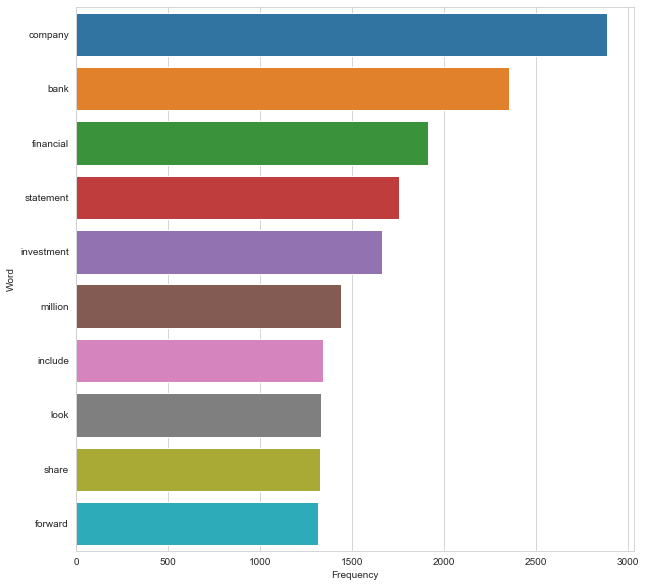

In [31]:
#Here we are simply trying to see how many times has a word in our data appeared.

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

Here we have used a package called WordCloud which is a very interesting package to bring to use when we want to display our data in the form of visualization.

This is used to show the frequency and significance of certain words in our dataset.

So, over here we are using wordcloud package which is a data visualization technique to represent text data - in which basically the size of each word indicates its frequency or importance

In [32]:
#Using WordCloud Package

def wc(data,bgcolor,title):
    plt.figure(figsize = (80,80))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

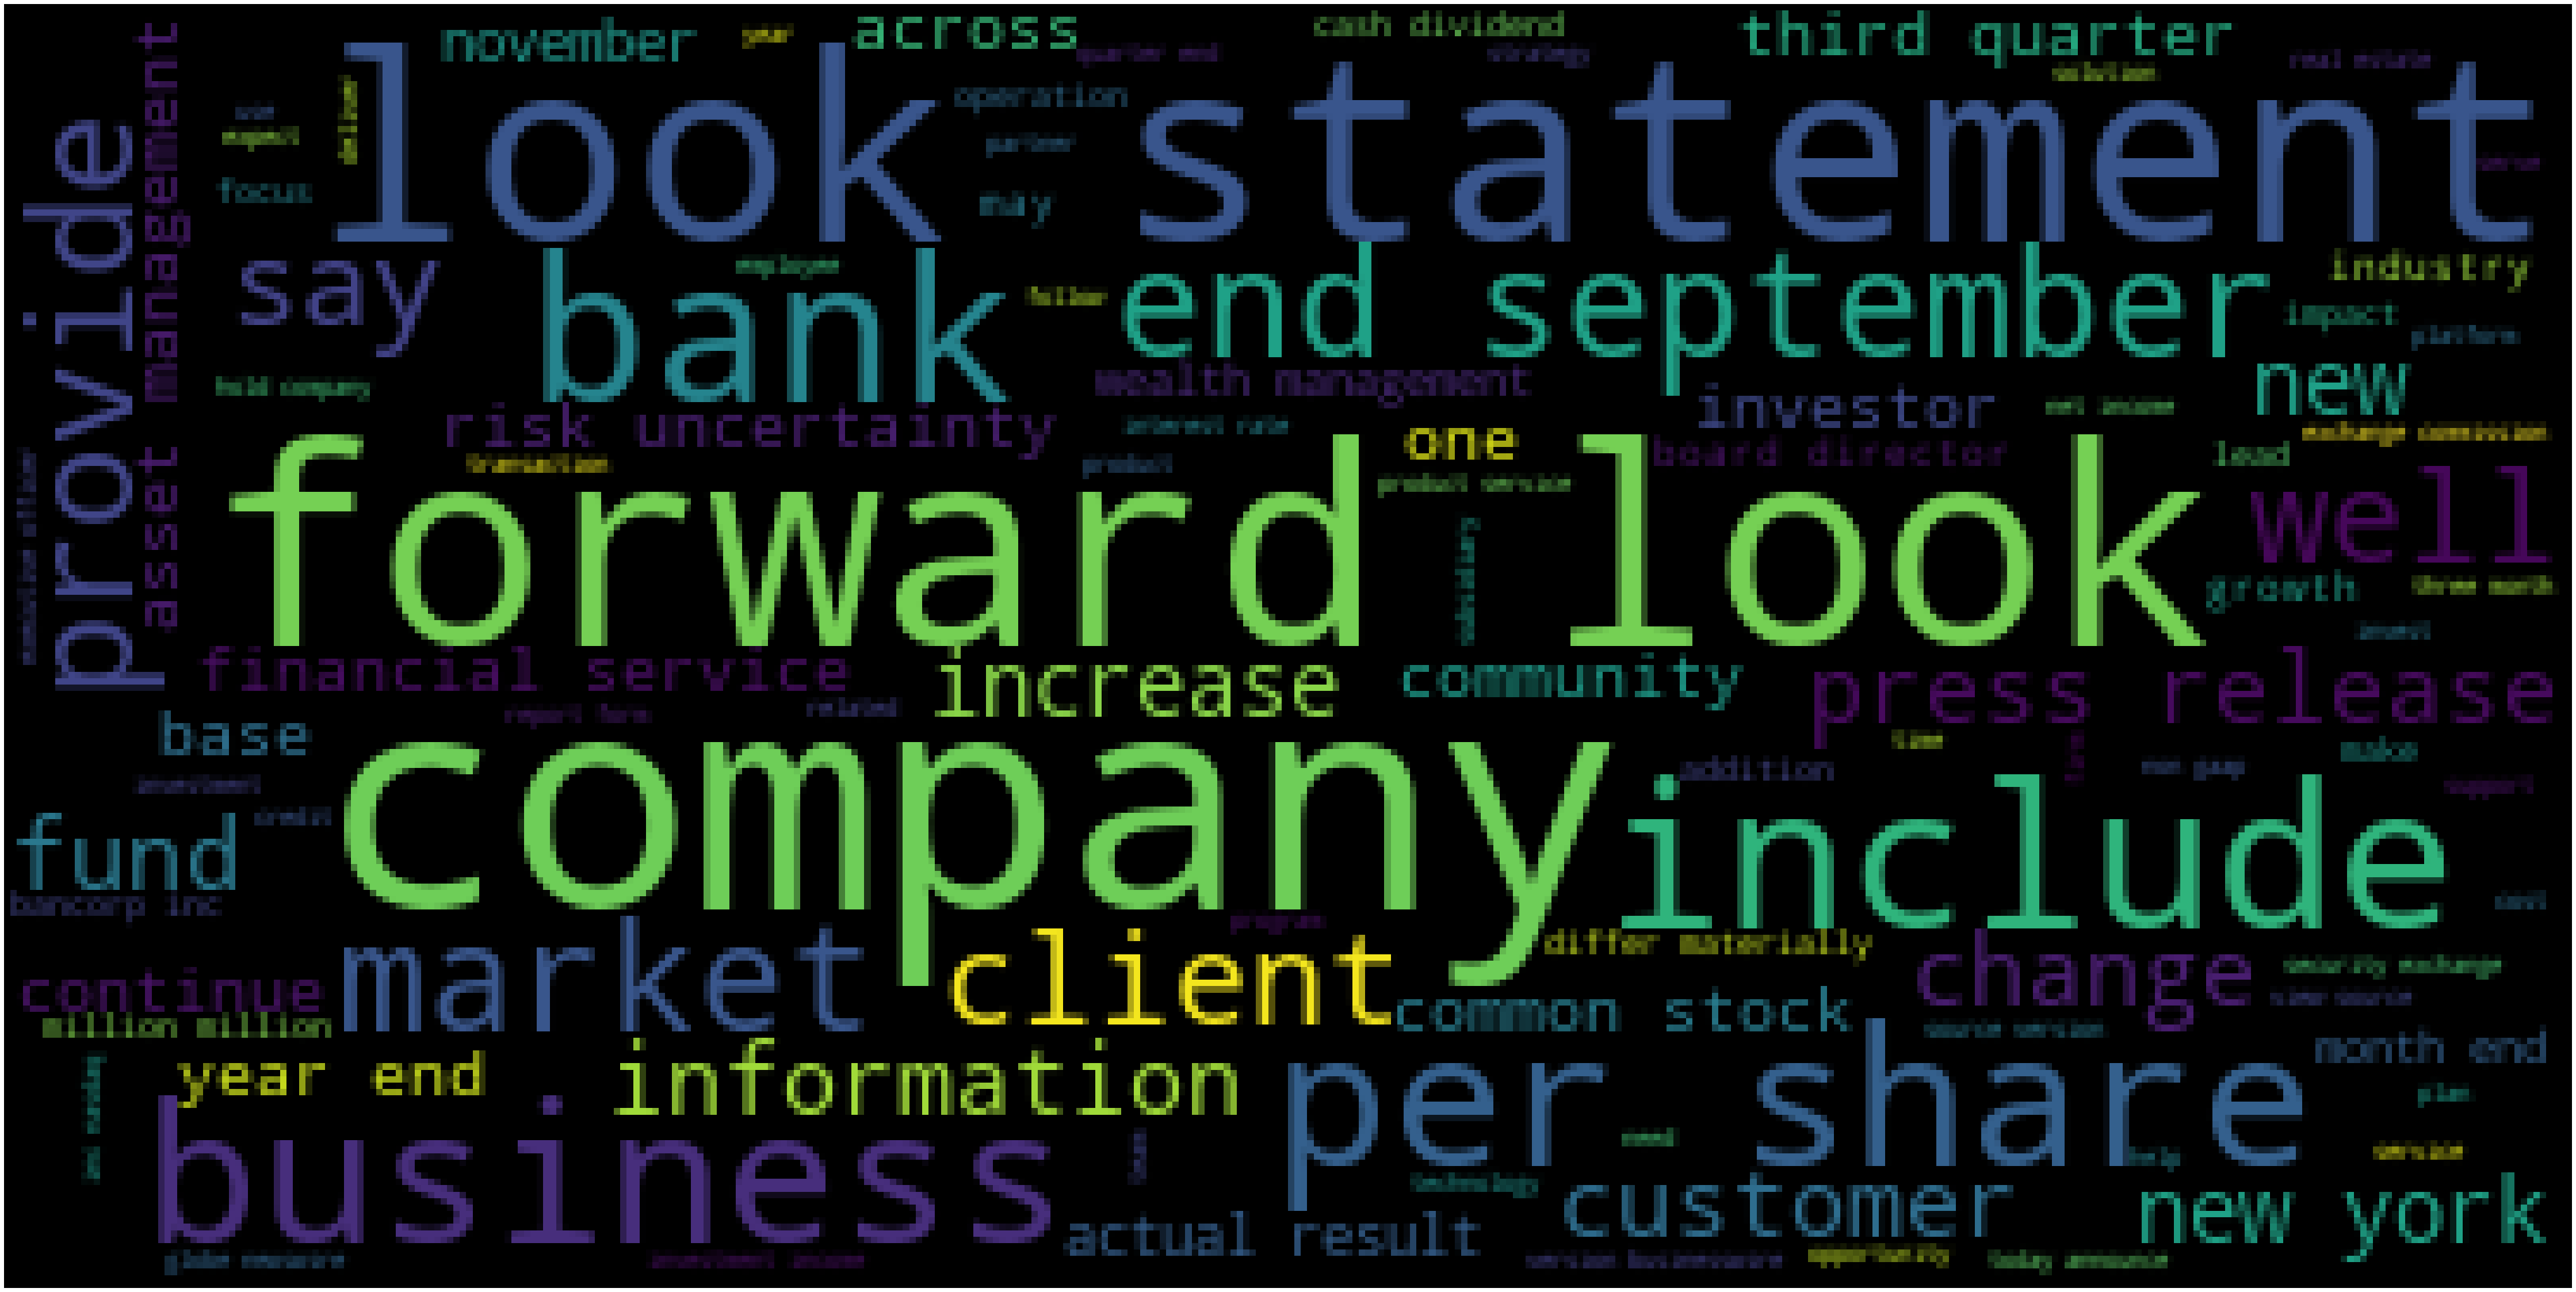

In [33]:
#The bigger the word is, that means it has appeared more times in the articles

wc(lemmatized_output,'black','Common Words' )

Sentiment Intensity Analyser Method is used to find the sentiments or lets say Polarity of a sentence

In [34]:
#Here we are simply calling the Sentiment Intensity Analyzer Method
#And storing it in variable sent_analyser

sent_analyser = SentimentIntensityAnalyzer()

def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [35]:
#Here we have applied the above function to the textclean column 
#And a new column 'Polarity' is created

data["Polarity"] = data["textclean"].apply(sentiment)

/var/folders/1z/tcf36f893gx3rrkp37xswn3r0000gn/T/ipykernel_43761/1271106363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Polarity"] = data["textclean"].apply(sentiment)


Displaying the first few rows of our dataset to check if the methods applied above have worked in our dataset

In [36]:
data.head()

,Unnamed: 0,Symbol,Company Name,Share Price,Today's Change,Year-to-Date,Previous close,Today’s open,Day’s range,Volume,...,Next reporting date,EPS forecast (this quarter),Annual revenue (last year),Annual profit (last year),Net profit margin,Release Date,Title,Article,textclean,Polarity
4,4,AMNB,American National Bankshares,38.79,+0.22 / +0.57%,+2.95%,38.57,38.24,38.10 - 38.79,594,...,"January 19, 2023",$0.87,$117.8M,$43.5M,36.94%,Nov 16,American National Bankshares Inc. Announces In...,american national bankshares inc. announces in...,american national bankshares inc. announces in...,0.9712
5,5,AMTB,Amerant Bancorp,29.63,+0.20 / +0.68%,-14.24%,29.43,29.20,29.40 - 29.79,358,...,"February 1, 2023",$0.68,$304.6M,$112.9M,37.07%,Nov 17,"Amerant Bank 5K, Benefitting United Way Miami ...","amerant bank 5k, benefitting united way miami ...","amerant bank 5k, benefitting united way miami ...",0.9986
11,11,AUBN,Auburn National Bancorporation,22.52,0.00 / 0.00%,-30.28%,22.52,23.74,22.51 - 23.74,574,...,--,--,$30.8M,$8.0M,26.10%,Nov 08,"Auburn National Bancorporation, Inc. Declares ...","auburn national bancorporation, inc. declares ...","auburn national bancorporation, inc. declares ...",0.4927
13,13,BAC,Bank of America,36.03,-0.97 / -2.62%,-18.97%,36.55,36.06,35.81 - 36.29,27810702,...,"January 13, 2023",$0.85,$95.8B,$32.0B,33.39%,Nov 28,Bank of America Corporation Announces Hypothet...,bank of america corporation announces hypothet...,bank of america corporation announces hypothet...,0.9999
14,14,BANC,Banc of California,16.77,-0.12 / -0.71%,-14.53%,16.89,16.77,16.69 - 16.85,103773,...,"January 26, 2023",$0.44,$310.5M,$62.2M,20.04%,Nov 14,Banc of California Names Raymond Rindone Chief...,banc of california names raymond rindone chief...,banc of california names raymond rindone chief...,0.9973


Over here, we are simply checking on the datatype of the dataset again just to make sure everything is in the right form 
as it should be in for our analysis to work appropriately

In [37]:
#Checking Datatypes
data.dtypes

Unnamed: 0                          int64
Symbol                             object
Company Name                       object
Share Price                       float64
Today's Change                     object
Year-to-Date                       object
Previous close                    float64
Today’s open                      float64
Day’s range                        object
Volume                              int64
Average volume (3 months)           int64
Market cap                         object
Earnings growth (last year)        object
Earnings growth (this year)        object
Earnings growth (next 5 years)     object
Revenue growth (last year)         object
P/E ratio                          object
Price/Sales                        object
Price/Book                         object
Next reporting date                object
EPS forecast (this quarter)        object
Annual revenue (last year)         object
Annual profit (last year)          object
Net profit margin                 

Polarity of a scentence is nothing but if a sentence is negative or positive 

And also to what extent are they negative or positive

In [38]:
#Here we are simply assigning values to our polarity column 
#We are doing this to display positive sentiments and negative sentiments

def senti(data):
    if data['Polarity'] > 0.7:
        val = "Positive"
    elif data['Polarity'] <= 0.7:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [39]:
#Created a new column called Sentiment and applied the above function to this column
data['Sentiment'] = data.apply(senti, axis=1)

/var/folders/1z/tcf36f893gx3rrkp37xswn3r0000gn/T/ipykernel_43761/1683901013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data.apply(senti, axis=1)


Here we have used Seaborn Package again to display our data in the form of graph 

This helps us visualize our data in a better manner and lets us understand how many articles are positive, neutral and how many are negative.

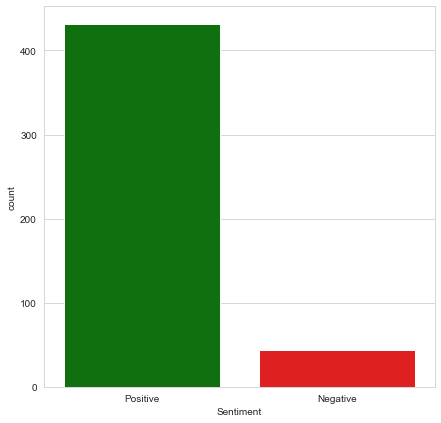

In [40]:
#Plotting data using seaborn 

plt.figure(figsize=(7,7))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment", data=data, 
                  palette=dict(Neutral="blue", Positive="Green", Negative="Red"))

In [41]:
#!pip install -U https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz --user

Here we are importing the package called spacy library for NLP so that we could deal with features like POS tagging

In [42]:
#Import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

In [45]:
#Defining position

def pos(text):
    doc = nlp(text)
    # We want list of Adjective tokens 
    aspects = [token.text for token in doc if token.pos_ == "ADJ"]
    return aspects

In [46]:
#We are applying the above function to the textclean column 
#And assigning it to a new column that we just created called Aspects

data["Aspects"] = data["textclean"].apply(pos)

/var/folders/1z/tcf36f893gx3rrkp37xswn3r0000gn/T/ipykernel_43761/238816200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Aspects"] = data["textclean"].apply(pos)


In [47]:
#Displaying the first few rows
data.head()

,Unnamed: 0,Symbol,Company Name,Share Price,Today's Change,Year-to-Date,Previous close,Today’s open,Day’s range,Volume,...,Annual revenue (last year),Annual profit (last year),Net profit margin,Release Date,Title,Article,textclean,Polarity,Sentiment,Aspects
4,4,AMNB,American National Bankshares,38.79,+0.22 / +0.57%,+2.95%,38.57,38.24,38.10 - 38.79,594,...,$117.8M,$43.5M,36.94%,Nov 16,American National Bankshares Inc. Announces In...,american national bankshares inc. announces in...,american national bankshares inc. announces in...,0.9712,Positive,"[american, national, quarterly, american, nati..."
5,5,AMTB,Amerant Bancorp,29.63,+0.20 / +0.68%,-14.24%,29.43,29.20,29.40 - 29.79,358,...,$304.6M,$112.9M,37.07%,Nov 17,"Amerant Bank 5K, Benefitting United Way Miami ...","amerant bank 5k, benefitting united way miami ...","amerant bank 5k, benefitting united way miami ...",0.9986,Positive,"[amerant, united, amerant, largest, amerant, c..."
11,11,AUBN,Auburn National Bancorporation,22.52,0.00 / 0.00%,-30.28%,22.52,23.74,22.51 - 23.74,574,...,$30.8M,$8.0M,26.10%,Nov 08,"Auburn National Bancorporation, Inc. Declares ...","auburn national bancorporation, inc. declares ...","auburn national bancorporation, inc. declares ...",0.4927,Negative,"[national, inc, quarterly, auburn, national, f..."
13,13,BAC,Bank of America,36.03,-0.97 / -2.62%,-18.97%,36.55,36.06,35.81 - 36.29,27810702,...,$95.8B,$32.0B,33.39%,Nov 28,Bank of America Corporation Announces Hypothet...,bank of america corporation announces hypothet...,bank of america corporation announces hypothet...,0.9999,Positive,"[hypothetical, hypothetical, total, depositary..."
14,14,BANC,Banc of California,16.77,-0.12 / -0.71%,-14.53%,16.89,16.77,16.69 - 16.85,103773,...,$310.5M,$62.2M,20.04%,Nov 14,Banc of California Names Raymond Rindone Chief...,banc of california names raymond rindone chief...,banc of california names raymond rindone chief...,0.9973,Positive,"[chief, deputy, chief, financial, raymond, chi..."


Here we are finally calling the most important columns of our dataset of this project

In [48]:
#Storing important columns in data
data=data[['Symbol','Company Name','Previous close','Share Price','Polarity','Sentiment','Aspects']]

In [49]:
# We have Used above data and stored in variable d1
d1=data 
d1

,Symbol,Company Name,Previous close,Share Price,Polarity,Sentiment,Aspects
4,AMNB,American National Bankshares,38.57,38.79,0.9712,Positive,"[american, national, quarterly, american, nati..."
5,AMTB,Amerant Bancorp,29.43,29.63,0.9986,Positive,"[amerant, united, amerant, largest, amerant, c..."
11,AUBN,Auburn National Bancorporation,22.52,22.52,0.4927,Negative,"[national, inc, quarterly, auburn, national, f..."
13,BAC,Bank of America,36.55,36.03,0.9999,Positive,"[hypothetical, hypothetical, total, depositary..."
14,BANC,Banc of California,16.89,16.77,0.9973,Positive,"[chief, deputy, chief, financial, raymond, chi..."
...,...,...,...,...,...,...,...
137,TW,Tradeweb Markets,63.41,64.55,0.9898,Positive,"[leading, global, electronic, common, open, ac..."
138,UBS,UBS Group AG,18.24,18.25,0.9986,Positive,"[ubs, top, listpr, private, top, sixth, consec..."
140,VCTR,Victory Capital Holdings,27.57,27.60,0.9869,Positive,"[second, consecutive, proud, annual, sixth, di..."
141,VIRT,Virtu Financial,21.46,21.52,0.9950,Positive,"[virtu, financial, new, financial, inc, extrao..."


In [50]:
#Selecting the column Aspects and converting it to a list 
#And then storing it in variable data_words

data_words = d1['Aspects'].values.tolist() 
data_words

#len(data_words)

[['american',
  'national',
  'quarterly',
  'american',
  'national',
  'amnb',
  'american',
  'national',
  'quarterly',
  'common',
  'payable',
  'prior',
  'fourth',
  '3.1%.about',
  'american',
  'nationalamerican',
  'multi',
  '-',
  'state',
  'total',
  'american',
  'american',
  'national',
  'american',
  'national',
  'american',
  'national',
  'additional',
  'additional',
  'american',
  'national',
  'american',
  'national',
  'available',
  'american',
  'national',
  'chief',
  'financial'],
 ['amerant',
  'united',
  'amerant',
  'largest',
  'amerant',
  'coral',
  'amerant',
  'second',
  '12th',
  'annual',
  'united',
  'stronger',
  'united',
  'financial',
  'iconic',
  'such',
  'coral',
  'historic',
  'festive',
  'post',
  '-',
  'race',
  'beautiful',
  'coral',
  'grateful',
  'amerant',
  'incredible',
  'friendly',
  'symeria',
  'united',
  'vulnerable',
  'amerant',
  'able',
  'proud',
  'second',
  'amerant',
  'united',
  'amerant',
  'committ

We have used Gensim package which is one of the very important packages and is used for Topic Modelling. 

In [51]:
#!pip install gensim 

import gensim.corpora as corpora 

#Create Dictionary of all aspect words where corpora function stores all words in key, value pair
id2word = corpora.Dictionary(data_words) 

# Create Corpus
texts = data_words

# Term Document Frequency
#id2word gives us then id of the word and how many times it has occured in the document
corpus = [id2word.doc2bow(text) for text in texts] 

#View the output
#Print 1th row from the list corpus. You can see it is in format (id of the word,Frequency)
print(corpus[:1]) 

[[(0, 1), (1, 1), (2, 2), (3, 11), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 9), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1)]]


In [52]:
#Here we have done this to view the words in a Humanly readable format
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]] 

[[('-', 1),
  ('3.1%.about', 1),
  ('additional', 2),
  ('american', 11),
  ('amnb', 1),
  ('available', 1),
  ('chief', 1),
  ('common', 1),
  ('financial', 1),
  ('fourth', 1),
  ('multi', 1),
  ('national', 9),
  ('nationalamerican', 1),
  ('payable', 1),
  ('prior', 1),
  ('quarterly', 2),
  ('state', 1),
  ('total', 1)]]

We have used Gensim package again for topic modeling & perform aspect based sentiment analysis

In our Project, we have tried to follow the hierarchy of performing Topic Modelling - By using the LDAModel module which basically finds patterns in the sentences and does classification of topics. 

After which it becomes easy for us to work on the aspects as the LDAModel itself puts the aspects under respective topics and makes it easy for us to perform sentiment analysis on them.

For example: Lets say we want 5 different topics .i.e the aspect words would be classified into 5 different topics

So over here, as you can see in the chunk below, we have used LDAModel package for topic modeling and do the needful

In the output below: The 0,1,2,3,.....,10 are the topics as we set the value of num_topics as 10 in our code.

And, the values in the output under the topic numbers: 0.031*"united" + 0.030*"global" and so on... are basically the word united in our column which has appeared 0.031% times and so on..

In [53]:
#Here, we will be using LDAModel package for topic modeling

from gensim.models import LdaMulticore 
from gensim.models import LdaModel
from pprint import pprint

# number of topics
num_topics = 10 

# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word, 
                     num_topics=num_topics, iterations=200)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.031*"united" + 0.030*"global" + 0.023*"more" + 0.020*"commercial" + '
  '0.019*"new" + 0.017*"popular" + 0.016*"suisse" + 0.014*"first" + '
  '0.014*"corelogic" + 0.013*"financial"'),
 (1,
  '0.039*"global" + 0.032*"new" + 0.029*"financial" + 0.020*"more" + '
  '0.014*"other" + 0.011*"-" + 0.010*"annual" + 0.010*"commercial" + '
  '0.009*"real" + 0.009*"third"'),
 (2,
  '0.039*"financial" + 0.032*"first" + 0.021*"common" + 0.021*"other" + '
  '0.021*"more" + 0.015*"such" + 0.013*"future" + 0.013*"new" + '
  '0.013*"quarterly" + 0.013*"chief"'),
 (3,
  '0.047*"financial" + 0.027*"new" + 0.024*"net" + 0.021*"global" + '
  '0.020*"average" + 0.017*"more" + 0.017*"other" + 0.017*"commercial" + '
  '0.015*"-" + 0.014*"total"'),
 (4,
  '0.060*"financial" + 0.033*"other" + 0.025*"such" + 0.022*"future" + '
  '0.020*"new" + 0.018*"more" + 0.015*"common" + 0.015*"economic" + '
  '0.014*"actual" + 0.013*"current"'),
 (5,
  '0.040*"non" + 0.040*"-" + 0.037*"net" + 0.034*"gaap" + 0.028*"

Gensim package helps us with topic modelling and the FastText model that we imported here is used for finding semantic similarities

It can also be used for text classification(ex: spam filtering).

It is something that can train large datasets in minutes and save us a lot of time.

In [54]:
#Import FastText module from Gensim package as below

from gensim.models import FastText
fasttext_model = FastText(data_words, vector_size= 100,window=5, min_count=5, workers=4,sg=1)


In [55]:
#fasttext_model = FastText.load_fasttext_format("../input/fast100/cc.en.100.bin")
fasttext_model.save("FastText-Model-For-ABSA.bin")

Here we have assumed these extended aspect words to be the most important and the most impacting words for the sentiment analysis for our article.

In [56]:
#These extended aspects are assumed to be right with the help of aspect list created above

aspects = ["risks","dividend", "debt", "Increases", "purchased","great","outstanding"]

def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0

Here we are applying the above function to our previous aspects column to tally and fetch similarity 

We are trying to put the similar words under different columns created out of our extended aspects

In [57]:
#Importing tqdm

from tqdm import tqdm
tqdm.pandas()
for aspect in aspects:
    d1[aspect] = d1['Aspects'].progress_map(lambda text: get_similarity(text, aspect))

100%|█████████████████████████████████████████| 475/475 [00:06<00:00, 69.36it/s]
/var/folders/1z/tcf36f893gx3rrkp37xswn3r0000gn/T/ipykernel_43761/3101863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1[aspect] = d1['Aspects'].progress_map(lambda text: get_similarity(text, aspect))
100%|█████████████████████████████████████████| 475/475 [00:09<00:00, 49.59it/s]


Over here we are trying to see the negative sentiments

In [58]:
#Trying to see the negative ones
d1[d1['Sentiment']=='Negative'].head(5)

,Symbol,Company Name,Previous close,Share Price,Polarity,Sentiment,Aspects,risks,dividend,debt,Increases,purchased,great,outstanding
11,AUBN,Auburn National Bancorporation,22.52,22.52,0.4927,Negative,"[national, inc, quarterly, auburn, national, f...",0.097787,0.384021,0.364223,0.368584,0.462830,-0.084558,-0.024853
24,BCML,BayCom,18.79,19.20,0.5422,Negative,"[united, quarterly, outstanding, common, payab...",0.298733,0.285703,0.339645,0.443731,0.532490,0.436433,0.484012
43,BRKL,Brookline Bancorp,13.98,13.95,-0.7411,Negative,"[financial, financial, potential, effective, s...",0.319577,0.249218,0.225008,0.399006,0.413269,0.663755,0.684522
58,CATY,Cathay General Bancorp,46.44,46.27,0.5267,Negative,"[cathay, general, general, common, payable, ca...",0.170525,0.051435,0.000472,0.114846,0.106156,0.964864,0.960723
64,CCB,Coastal Financial,49.88,51.86,-0.9202,Negative,"[coastal, financial, coastal, financial, eric,...",0.301361,0.205788,0.145596,0.378819,0.420624,0.632047,0.661580


Over here we are trying to see the positive sentiments

In [59]:
#Trying to see the positive ones
d1[d1['Sentiment']=='Positive'].head(5)

,Symbol,Company Name,Previous close,Share Price,Polarity,Sentiment,Aspects,risks,dividend,debt,Increases,purchased,great,outstanding
4,AMNB,American National Bankshares,38.57,38.79,0.9712,Positive,"[american, national, quarterly, american, nati...",0.224816,0.291576,0.171569,0.509084,0.491600,-0.060836,-0.024462
5,AMTB,Amerant Bancorp,29.43,29.63,0.9986,Positive,"[amerant, united, amerant, largest, amerant, c...",0.356106,0.256732,0.199846,0.441404,0.420683,0.580434,0.608794
13,BAC,Bank of America,36.55,36.03,0.9999,Positive,"[hypothetical, hypothetical, total, depositary...",0.417678,0.276067,0.309759,0.509278,0.592573,0.438407,0.461880
14,BANC,Banc of California,16.89,16.77,0.9973,Positive,"[chief, deputy, chief, financial, raymond, chi...",0.265635,0.288135,0.202952,0.313550,0.347213,0.748632,0.775842
18,BBAR,Banco BBVA Argentina,3.19,3.10,0.9918,Positive,"[third, consolidated, third, pursuant, compara...",0.336110,0.217805,0.146326,0.285073,0.297229,0.810207,0.825707


Displaying the Final Result of our Project

In [64]:
#Displaying the first 50 rows of our Final Result
d1.head(50)

,Symbol,Company Name,Previous close,Share Price,Polarity,Sentiment,Aspects,risks,dividend,debt,Increases,purchased,great,outstanding
4,AMNB,American National Bankshares,38.57,38.79,0.9712,Positive,"[american, national, quarterly, american, nati...",0.224816,0.291576,0.171569,0.509084,0.491600,-0.060836,-0.024462
5,AMTB,Amerant Bancorp,29.43,29.63,0.9986,Positive,"[amerant, united, amerant, largest, amerant, c...",0.356106,0.256732,0.199846,0.441404,0.420683,0.580434,0.608794
11,AUBN,Auburn National Bancorporation,22.52,22.52,0.4927,Negative,"[national, inc, quarterly, auburn, national, f...",0.097787,0.384021,0.364223,0.368584,0.462830,-0.084558,-0.024853
13,BAC,Bank of America,36.55,36.03,0.9999,Positive,"[hypothetical, hypothetical, total, depositary...",0.417678,0.276067,0.309759,0.509278,0.592573,0.438407,0.461880
14,BANC,Banc of California,16.89,16.77,0.9973,Positive,"[chief, deputy, chief, financial, raymond, chi...",0.265635,0.288135,0.202952,0.313550,0.347213,0.748632,0.775842
18,BBAR,Banco BBVA Argentina,3.19,3.10,0.9918,Positive,"[third, consolidated, third, pursuant, compara...",0.336110,0.217805,0.146326,0.285073,0.297229,0.810207,0.825707
22,BCBP,BCB Bancorp,18.92,19.15,0.9980,Positive,"[senior, chief, experienced, financial, succes...",0.270562,0.172937,0.099109,0.213837,0.207447,0.902871,0.913258
24,BCML,BayCom,18.79,19.20,0.5422,Negative,"[united, quarterly, outstanding, common, payab...",0.298733,0.285703,0.339645,0.443731,0.532490,0.436433,0.484012
25,BCS,Barclays,7.89,7.82,0.9309,Positive,"[crude, total, crude, total, due, certain, sub...",0.322813,0.288510,0.233911,0.352462,0.387649,0.744540,0.772819
28,BFST,Business First Bancshares,24.02,24.14,0.9967,Positive,"[chief, administrative, jerome, chief, adminis...",0.386819,0.297574,0.243651,0.402334,0.419522,0.667560,0.690654
